<img src="Assigment 1.jpg" width="1200" height="150" align="center">

## **- INTRODUCTION DATASET**
---
---

**Abstract:**

Data tersebut terkait dengan kampanye pemasaran langsung (panggilan telepon) dari lembaga perbankan Portugis. Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan deposito berjangka (variabel y).

**Data Set Information:**

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.

**Overview of the attributes :**

- Age : Usia customer
- Job : Pekerjaan customer
- Martial : Martial status of customer
- Education : Customer education level
- Default : Has credit in default?
- Housing : If costumer has housing loan
- Loan : Has Personal Loan
- Balance : Customer's individual balance
- Contact : Communication type
- Month : Last contact month of year
- Day : Last contact day of the week
- Duration : Last contact duration, in seconds
- Campaign : Number of contacts performed during this campaign and for this client
- Pdays : Number of days that passed by after the client was last contacted from a previous campaign
- Previous : Number of contacts performed before this campaign and for this client
- Poutcome : outcome of the previous marketing campaign Y has the client subscribed a term deposit

## **- IMPORT PUSTAKA**
---
---

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import std

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

## **- DATA LOADING**
---
---

In [24]:
df = pd.read_csv('bank-additional.csv',delimiter=';')

In [25]:
#df.head()

In [26]:
#Dataset has 4119 rows and 21 columns
df.shape

(4119, 21)

In [27]:
# no nulls present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

## **- EDA**
---
---

Pertama-tama, kita akan mencari tahu jumlah total client

In [28]:
df.shape[0]

4119

Mari kita mencari tahu umur client dengan menjumlahkannya berdasarkan umur. Kita akan memvisualisasikan dengan Histogram sebagai berikut.

<AxesSubplot: ylabel='Frequency'>

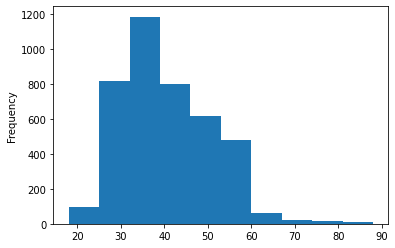

In [29]:
df["age"].plot(kind='hist')

Berdasarkan hasil grafik diatas diketahui bahwa client yang memiliki umur antara 19-88 tahun

In [30]:
dfage = pd.DataFrame(df['age'].value_counts()).T
dfage

,32,31,30,34,35,33,36,38,41,29,...,86,77,72,82,75,69,70,85,88,19
age,216,191,177,174,172,170,168,150,147,139,...,2,2,2,2,2,2,2,1,1,1


Mari kita mencari tahu jenis pekerjaan yang dimiliki client dengan menjumlahkannya berdasarkan jenis pekerjaannya. Kita akan memvisualisasikan dengan Bar Chart sebagai berikut.

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64


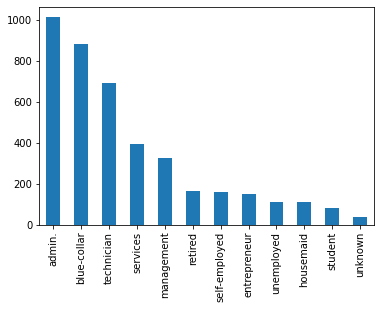

In [31]:
df["job"].value_counts().plot(kind='bar')
print(df['job'].value_counts())

Berdasarkan hasil grafik diatas diketahui bahwa client memiliki pekerjaan sebagai :
1. admin sebanyak 1012 orang
2. blue-collar sebanyak 884 orang
3. technician sebanyak 691 orang
4. services sebanyak 393 orang
5. management sebanyak 324 orang
6. retired sebanyak 166 orang
7. self-employed sebanyak 159 orang
8. entrepreneur sebanyak 148 orang
9. unemployed sebanyak 111 orang
10. housemaid sebanyak 110 orang
11. student sebanyak 82 orang
12. unknown sebanyak 39 orang

Mari kita mencari tahu berapa banyak client yang berlangganan deposito berjangka dengan menjumlahkannya berdasarkan yes dan no. Kita akan memvisualisasikan dengan Bar Chart sebagai berikut.

no     3668
yes     451
Name: y, dtype: int64


<AxesSubplot: >

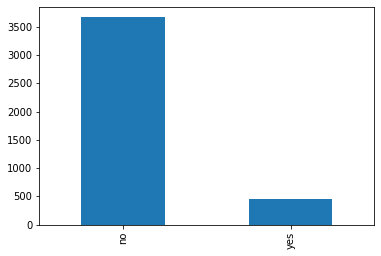

In [32]:
#unabalanced target
print(df["y"].value_counts())
df["y"].value_counts().plot(kind='bar')

Berdasarkan hasil grafik diatas diketahui bahwa ada sebanyak 3668 client yang tidak berlangganan dan 451 client yang berlangganan deposito berjangka

Kemudian kita akan memilih semua kolom dengan tipe data object

In [33]:
# membuat list Object_list
Object_list = df.select_dtypes(include = "object").columns
print(Object_list)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [34]:
# menggunakan Label encoder 
le = LabelEncoder()

for col in df[Object_list]:
    df[col] = le.fit_transform(df[col].astype(str))

**CORRELATION KOEFISIEN**

Kita akan mengidentifikasi fitur-fitur yang sangat berkorelasi dengan menggunakan method corr()

In [35]:
corr_matrix = df.corr().abs()
corr_matrix

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.014618,0.393795,0.125520,0.160562,0.007279,0.008605,0.012700,0.020909,0.029297,...,0.014169,0.043425,0.050931,0.012975,0.019192,0.000482,0.098135,0.015033,0.041936,0.060374
job,0.014618,1.000000,0.013616,0.134717,0.040194,0.002725,0.000800,0.011981,0.016835,0.004120,...,0.002553,0.007936,0.024140,0.020159,0.021355,0.004887,0.039656,0.019559,0.033605,0.026725
marital,0.393795,0.013616,1.000000,0.104367,0.082149,0.002659,0.005926,0.067432,0.033537,0.007184,...,0.003015,0.040722,0.040098,0.001310,0.069164,0.046708,0.020724,0.079226,0.075167,0.043833
education,0.125520,0.134717,0.104367,1.000000,0.200550,0.030291,0.021281,0.116686,0.080912,0.042302,...,0.015626,0.060828,0.045926,0.029832,0.057203,0.086454,0.112925,0.048882,0.062012,0.067316
default,0.160562,0.040194,0.082149,0.200550,1.000000,0.011599,0.007872,0.149737,0.008608,0.014882,...,0.021068,0.089457,0.091654,0.000039,0.183946,0.161372,0.021327,0.176632,0.167660,0.076627
housing,0.007279,0.002725,0.002659,0.030291,0.011599,1.000000,0.064208,0.073007,0.039840,0.012389,...,0.018502,0.021673,0.025531,0.002946,0.055823,0.091175,0.029378,0.053022,0.030721,0.000957
loan,0.008605,0.000800,0.005926,0.021281,0.007872,0.064208,1.000000,0.004046,0.024046,0.002608,...,0.023456,0.006321,0.005520,0.006759,0.002150,0.014750,0.004077,0.008792,0.016286,0.012709
contact,0.012700,0.011981,0.067432,0.116686,0.149737,0.073007,0.004046,1.000000,0.258733,0.009579,...,0.085654,0.120670,0.215464,0.129369,0.383405,0.574452,0.252035,0.390313,0.261496,0.137401
month,0.020909,0.016835,0.033537,0.080912,0.008608,0.039840,0.024046,0.258733,1.000000,0.034290,...,0.083547,0.054892,0.107278,0.065263,0.215358,0.020019,0.038617,0.157782,0.253833,0.005049
day_of_week,0.029297,0.004120,0.007184,0.042302,0.014882,0.012389,0.002608,0.009579,0.034290,1.000000,...,0.039170,0.013141,0.016652,0.001393,0.034242,0.008207,0.038252,0.041313,0.036573,0.006370


Selanjutnya, kita akan memilih segitiga atas dari matriks korelasi

In [36]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

<ipython-input-36-f48403b9242a>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,NaN,0.014618,0.393795,0.125520,0.160562,0.007279,0.008605,0.012700,0.020909,0.029297,...,0.014169,0.043425,0.050931,0.012975,0.019192,0.000482,0.098135,0.015033,0.041936,0.060374
job,NaN,NaN,0.013616,0.134717,0.040194,0.002725,0.000800,0.011981,0.016835,0.004120,...,0.002553,0.007936,0.024140,0.020159,0.021355,0.004887,0.039656,0.019559,0.033605,0.026725
marital,NaN,NaN,NaN,0.104367,0.082149,0.002659,0.005926,0.067432,0.033537,0.007184,...,0.003015,0.040722,0.040098,0.001310,0.069164,0.046708,0.020724,0.079226,0.075167,0.043833
education,NaN,NaN,NaN,NaN,0.200550,0.030291,0.021281,0.116686,0.080912,0.042302,...,0.015626,0.060828,0.045926,0.029832,0.057203,0.086454,0.112925,0.048882,0.062012,0.067316
default,NaN,NaN,NaN,NaN,NaN,0.011599,0.007872,0.149737,0.008608,0.014882,...,0.021068,0.089457,0.091654,0.000039,0.183946,0.161372,0.021327,0.176632,0.167660,0.076627
housing,NaN,NaN,NaN,NaN,NaN,NaN,0.064208,0.073007,0.039840,0.012389,...,0.018502,0.021673,0.025531,0.002946,0.055823,0.091175,0.029378,0.053022,0.030721,0.000957
loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004046,0.024046,0.002608,...,0.023456,0.006321,0.005520,0.006759,0.002150,0.014750,0.004077,0.008792,0.016286,0.012709
contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258733,0.009579,...,0.085654,0.120670,0.215464,0.129369,0.383405,0.574452,0.252035,0.390313,0.261496,0.137401
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034290,...,0.083547,0.054892,0.107278,0.065263,0.215358,0.020019,0.038617,0.157782,0.253833,0.005049
day_of_week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039170,0.013141,0.016652,0.001393,0.034242,0.008207,0.038252,0.041313,0.036573,0.006370


Kemudian, mari kita temukan indeks kolom fitur dengan korelasi lebih besar dari 0,70

In [37]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
print("Columns to drop:",to_drop)

Columns to drop: ['cons.price.idx', 'euribor3m', 'nr.employed']


In [38]:
df.drop(to_drop,inplace=True,axis=1)
X=df.drop('y',axis=1)
y=df['y']

**SPLITTING DATA FOR TRAINING AND TESTING**

Mari kita lakukan splitting data untuk training dan testing

In [39]:
xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2)

**TRAINING**

In [40]:
clf = LogisticRegression(random_state=0)
clf.fit(xtrain,ytrain)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

**TESTING**

In [41]:
ypredict=clf.predict(xtest)
print("Score",clf.score(xtest,ytest))
print("Confusion matrix\n",metrics.confusion_matrix(ytest,ypredict))
print("\nAUCscore:",round(metrics.roc_auc_score(ytest,ypredict)*100,3),"%")

Score 0.9004854368932039
Confusion matrix
 [[715  21]
 [ 61  27]]

AUCscore: 63.914 %


**CLASSIFICATION**

In [42]:
print(metrics.classification_report(ytest,ypredict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       736
           1       0.56      0.31      0.40        88

    accuracy                           0.90       824
   macro avg       0.74      0.64      0.67       824
weighted avg       0.88      0.90      0.89       824



In [43]:
cv = RepeatedStratifiedKFold(n_splits=10,
                             n_repeats=3,
                             random_state=1)

roc_auc= cross_val_score(clf, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print("roc_auc scores in Repeated K fold", round(mean(roc_auc)*100,3))

roc_auc scores in Repeated K fold 92.109
